### Neurophysiology and Biophysics - Practical course WS 2024/25
__Cornelia Kopp-Scheinpflug & Kay Thurley__

# Miniproject: Gap junctions and network synchorization

In this notebook we simulate a small network of electrically coupled Drosophila motoneurons. The network shows different regimes of synchrony depending on the coupling strength of the GAP junctions, which is supposed to underly the insect's flight. The model was used in Hürkey et al. (2023) and adapted by Kay Thurley (2024).


_Requirements:_ You will need Python 3 and the packages Numpy, Matplotlib and BRIAN2.


We start by importing the relevant packages.

In [4]:
import numpy as np
from brian2 import *
import sys, os
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())
import json

from utils.brianutils import units
from utils.random_initial_conditions import *
from utils.sim import *
from utils.convert_ggap_ccs import *
from utils.spiketime_analysis_helper import *
from utils.convert_ggap_ccs import *

Then we define load some parameters and define the neuron.

In [5]:
md_SNL = json.load(open("cfg/Berger_SNL.json"))
md_SNIC = json.load(open("cfg/Berger_SNIC.json"))
ggap_hom = np.load('cfg/ggap_hom.npy')*nS
ggap_het = np.load('cfg/ggap_het.npy')*nS

In [8]:
### Splayness vs coupling coefficient
# cc_array = [0.001, 0.1, 0.2, 0.3]
    # g_gap = .15*nS
dur = 5*second
solver = 'rk4'
dt = 100*us
N = 5
cc_array = np.arange(0.01, 0.31, 0.02)
num_runs = 2
spm_array_all = []
for i in range(num_runs):
    spm_array = []
    for cc in cc_array:
        g_gap_now = cc2ggap(cc)
        g_gap = g_gap_now
        fname='SNL_weakcoupling_nonoise'
        φs_chosen = np.array([0.9, 0.6, 0.5, 0.7, 0.8])
        initial_values = pick_initial_phase_SNL(φs_chosen)
        StM1, SpM1 = run_sim(N, md_SNL, g_gap, None, initial_values=initial_values,
                            dur=dur, σnoise=None, solver=solver, dt=dt) 
        spm_array.append(get_splayness(SpM1, 1, 4, 100e-6)[1])
    spm_array_all.append(spm_array)
    # print(f'cc={cc}: {get_splayness(SpM1, 1, 4, 100e-6)[1]}')


Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s


WARNING    'g_gap' is an internal variable of group 'synapses', but also exists in the run namespace with the value 266.72164948 * psiemens. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s


WARNING    'g_gap' is an internal variable of group 'synapses', but also exists in the run namespace with the value 0.45389474 * nsiemens. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s


WARNING    'g_gap' is an internal variable of group 'synapses', but also exists in the run namespace with the value 0.64911828 * nsiemens. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s


WARNING    'g_gap' is an internal variable of group 'synapses', but also exists in the run namespace with the value 0.85292308 * nsiemens. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s


WARNING    'g_gap' is an internal variable of group 'synapses', but also exists in the run namespace with the value 1.06588764 * nsiemens. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s


WARNING    'g_gap' is an internal variable of group 'synapses', but also exists in the run namespace with the value 1.28864368 * nsiemens. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s


WARNING    'g_gap' is an internal variable of group 'synapses', but also exists in the run namespace with the value 1.52188235 * nsiemens. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s


WARNING    'g_gap' is an internal variable of group 'synapses', but also exists in the run namespace with the value 1.76636145 * nsiemens. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s


WARNING    'g_gap' is an internal variable of group 'synapses', but also exists in the run namespace with the value 2.02291358 * nsiemens. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s


WARNING    'g_gap' is an internal variable of group 'synapses', but also exists in the run namespace with the value 2.2924557 * nsiemens. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s


WARNING    'g_gap' is an internal variable of group 'synapses', but also exists in the run namespace with the value 2.576 * nsiemens. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s


WARNING    'g_gap' is an internal variable of group 'synapses', but also exists in the run namespace with the value 2.87466667 * nsiemens. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s


WARNING    'g_gap' is an internal variable of group 'synapses', but also exists in the run namespace with the value 3.18969863 * nsiemens. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s


WARNING    'g_gap' is an internal variable of group 'synapses', but also exists in the run namespace with the value 3.52247887 * nsiemens. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 7s
Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s
Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s
Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s
Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s
Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s
Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s
Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s
Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s
Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s
Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s
Starting simulation at t=0. s for a duration of 5. s
5. s (100%) simulated in 6s
Starting simulation at t=0. 

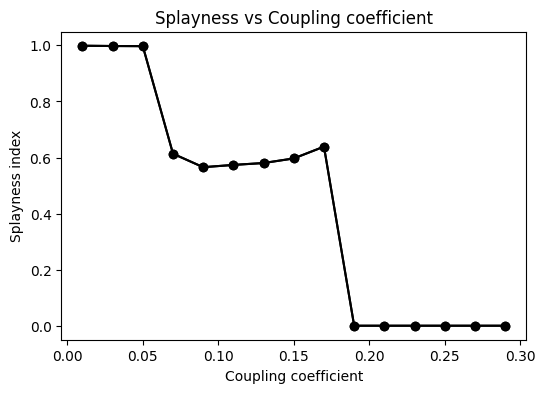

In [13]:
# plot cc vs splayness
fig, ax = plt.subplots(figsize=(6,4))
for spm_array in spm_array_all:
    ax.plot(cc_array, spm_array, '-o', c='k')
ax.set_xlabel('Coupling coefficient')
ax.set_ylabel('Splayness index')
ax.set_title('Splayness vs Coupling coefficient')
plt.show()



In [ ]:
tstart 

2.0738

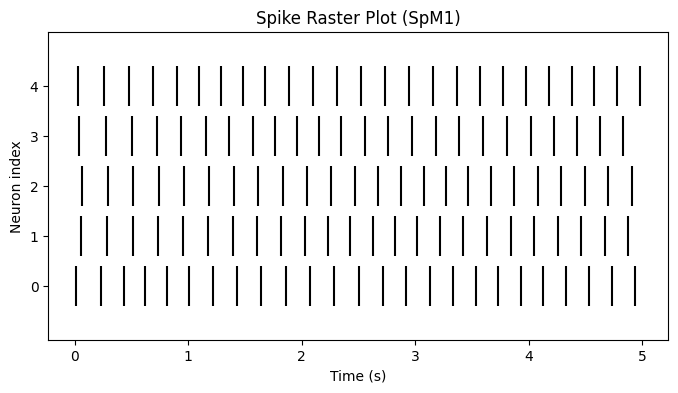

In [ ]:
# find interspike intervals for 4 neurons
N = 5
isi_list = []
for i in range(N):
    spike_times_i = SpM1.t_[SpM1.i == i] / ms  # convert to ms
    isis = np.diff(spike_times_i)  # interspike intervals
    isi_list.append(isis)

print("Interspike Intervals (ms) for each neuron:")
for i, isis in enumerate(isi_list):
    print(f"Neuron {i}: {isis}")
#!/usr/bin/env python3
import numpy as np
from brian2 import *

Interspike Intervals (ms) for each neuron:
Neuron 0: [215.2 202.5 190.7 189.6 198.2 206.4 211.6 214.3 214.9 214.7 214.3 213.1
 211.3 209.  206.4 203.5 200.5 198.2 197.3 198.3 200.2 202.5 204.4 205.5] Hz
Neuron 1: [231.7 226.6 222.4 220.7 218.8 216.8 214.8 212.2 208.1 203.4 198.8 195.4
 195.2 198.  201.8 204.9 206.9 208.  208.2 208.  207.2 206.  204.6] Hz
Neuron 2: [229.2 225.5 222.3 221.2 219.9 218.7 217.7 216.2 213.9 211.6 208.8 205.1
 201.1 197.8 196.6 197.7 200.3 203.1 205.2 206.6 207.3 207.4 206.9] Hz
Neuron 3: [232.  226.5 220.9 217.6 214.  209.3 203.5 197.2 192.9 193.8 198.6 203.4
 206.9 208.9 209.9 210.2 209.8 208.9 207.5 205.7 203.8 201.8 200.2] Hz
Neuron 4: [228.  221.6 213.5 205.2 196.8 191.5 193.5 200.1 206.1 209.9 212.  212.6
 212.1 211.4 210.4 209.  207.4 205.1 202.7 200.5 198.9 198.8 199.7 201.3] Hz
